### Python EDA FINAL PROJECT

By now you should be comfortable with working on an end to end Exploratory Data Analysis in Python. For this final assignment/project, we would like you to study and pick a dataset from one of the links below. Treat the project as a business case and solve the problem. A total of **100 points** is allocated to this project.

**Datasets chosen:**

Food Chain Campaign( a bit more on statistics): https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test

**Rubric as below:**

| Section           | Criteria                                                                                                     | Points |
|-------------------|--------------------------------------------------------------------------------------------------------------|--------|
| Project Scope     | Is the project goals and objectives mentioned?                                                               | 5      |
| Analysis          | Data is cleaned and transformed properly                                                                     | 5      |
|                   | Basic metadata exploration and data columns to variable type have been mapped out clearly                   | 5      |
|                   | At least 10 questions are asked and these are related to the business case                                   | 5      |
|                   | The student has analyzed the data using univariate analysis and written his insights                         | 5      |
|                   | The student has analyzed the data using bivariate analysis and written his insights                           | 5      |
|                   | The student has analyzed the data using multivariate analysis and written his insights                         | 5      |
|                   | The student has used the correct charts and plots for each type of analysis and interpreted them correctly. At least three charts for each type of analysis | 10     |
|                   | The student has used different elements to describe the graph(labels for each axis, legend if required, title, aesthetics - styles, colors, size, etc.) | 5      |
|                   | Use of statistics - Measures of central tendency (mean, median, mode, quartiles), spread (standard deviation, variance, range, IQR), Shape (Kurtosis, Skewness, and Modality), and Frequencies, Co-occurrences, and/or other statistical analysis method | 5      |
| Code Quality      | No errors produced while running the notebook, code is readable                                              | 10     |
| Overall conclusions| At least 3 important insights and final conclusions are included.                                           | 20     |
|                   | The insights should be interesting enough instead of just out of common sense.                              |        |
|                   | The conclusions are drawn logically and reasonably without logic fallacy                                    | 5      |
|                   | The project included potential actions or next steps that could be taken, based on the analysis                | 10     |


---------------------------------------------------------

# Fast Food Marketing Campaign A/B Test

**About data**

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

**Goals of the test:**

Analyze A/B test results to find the most effective marketing strategy among the three promotion types.

**Procedure:**

Create a 'control' (Promotion 1) and a 'challenger' (Promotion 2 & Promotion 3). Test to see how the challengers compare to the control.

- Control group: Promotion 1
- Experimental group: Promotion 2, Promotion 3 (= Challengers)

## Step 0: Import needed libaries

In [1]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action="ignore")

In [2]:
!python --version

Python 3.9.0


In [3]:
!pip --version

pip 23.1.2 from C:\Users\yongsheng.tan\AppData\Local\miniconda3\envs\quant_lab\lib\site-packages\pip (python 3.9)



In [4]:
%matplotlib inline

### Step 1: Data Cleaning

In [5]:
df = pandas.read_csv("WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [6]:
# change data type of dataframe
category_variable = ["MarketID", "MarketSize", "LocationID","Promotion","week"]
num_variable = ["SalesInThousands"]

df2 = df.copy()
df2[category_variable] = df2[category_variable].astype("category")

In [7]:
# check data type of each variables
print(df2.dtypes)

MarketID            category
MarketSize          category
LocationID          category
AgeOfStore             int64
Promotion           category
week                category
SalesInThousands     float64
dtype: object


In [8]:
# are there any missing values in the datasets?
print(df2.isna().sum())

print("\nThere is no missing values in this dataset.")

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

There is no missing values in this dataset.


In [9]:
# Are there any row of records duplicated in the dataset?
print(f"There is {df2.duplicated().sum()} row(s) duplicated.")

There is 0 row(s) duplicated.



Handling Outliers in dataset
------------------------------      
There are a few sales outliers, 
and I've decided to keep them in our dataset. 
It's because these outliers are genuine and not 
the result of errors in observation or calculation.



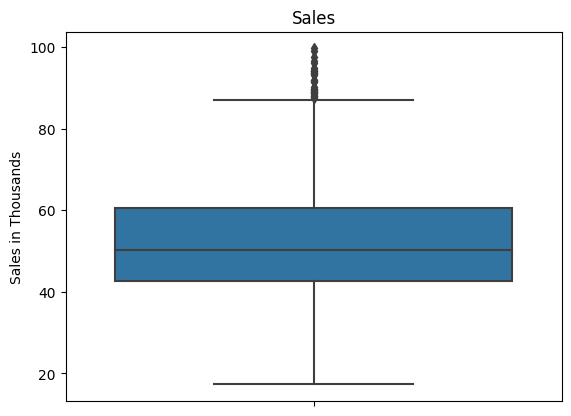

In [10]:
# Are there any outliers for sales column in this dataset?  
sns.boxplot(y="SalesInThousands", data=df2)
plt.ylabel("Sales in Thousands")
plt.title("Sales")

print("""
Handling Outliers in dataset
------------------------------      
There are a few sales outliers, 
and I've decided to keep them in our dataset. 
It's because these outliers are genuine and not 
the result of errors in observation or calculation.
""")

### Step 2: Study and check the data

How many observations in the dataset?

In [11]:
print(df2.shape[0])

548


How many markets available for product selling?

In [12]:
print(df2["MarketID"].nunique())

10


How many locations available for product selling?

In [13]:
print(df2["LocationID"].nunique())

137


What's mean age of store, along with its minimum and maximum values?

In [14]:
print("Mean: %.4f years" % df2['AgeOfStore'].mean())
print("Min: %.4f years" % df2['AgeOfStore'].min())
print("Max: %.4f years" % df2['AgeOfStore'].max())

Mean: 8.5036 years
Min: 1.0000 years
Max: 28.0000 years


How many types of promotions were employed for this A/B testing?

In [15]:
print(df2["Promotion"].nunique())

3


What was the duration of the A/B test?

In [16]:
print(df2["week"].unique())
print("\nIt's around 4 weeks")

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

It's around 4 weeks


What is the total sales amount for four weeks?

In [17]:
print("$ {:,.0f}".format(df2["SalesInThousands"].sum() * 1000))

$ 29,299,480


Dataset summary

In [18]:
print("""Description of the dataset
=============================
There are a total of 548 observations in the dataset.
      
- MarketID: Market type (-> 10 unique markets)
- MarketSize: size of market area by sales (small, medium, large)
- LocationID: store location's unique identifier (-> 137 unique locations)
- AgeOfStore: age of store in years (1 - 28)
- Promotion: Promotion type (1-3)
- week: Week number (1-4) 
- SalesInThousands: sales amount for a specific LocationID, Promotion and week 

""")

Description of the dataset
There are a total of 548 observations in the dataset.
      
- MarketID: Market type (-> 10 unique markets)
- MarketSize: size of market area by sales (small, medium, large)
- LocationID: store location's unique identifier (-> 137 unique locations)
- AgeOfStore: age of store in years (1 - 28)
- Promotion: Promotion type (1-3)
- week: Week number (1-4) 
- SalesInThousands: sales amount for a specific LocationID, Promotion and week 




### Step 3: Descriptive Analysis

i. What are total sales across different promotion types?

Promotion 3 generates the highest sales among the threes, 
followed by Promotion 1 and Promotion 2


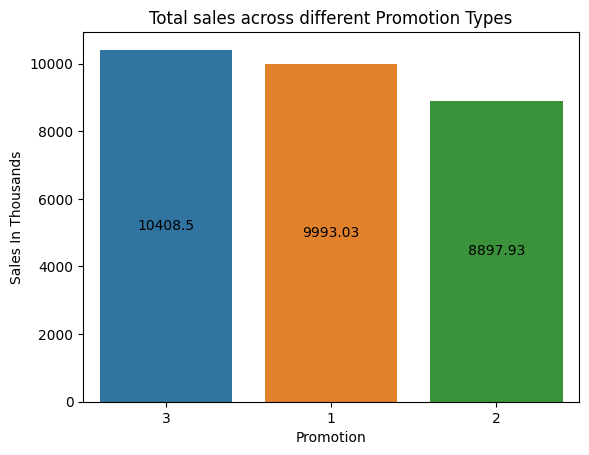

In [19]:
# Comparison of Sales by Week - Distributed by Promotion Types
print("""Promotion 3 generates the highest sales among the threes, 
followed by Promotion 1 and Promotion 2""")

sales_by_promotion = df2.groupby("Promotion")[
                "SalesInThousands"].sum(
                ).reset_index().sort_values(by="SalesInThousands",
                                            ascending=False)

sales_by_promotion["Promotion"] = sales_by_promotion["Promotion"].astype(str)
ax = sns.barplot(x="Promotion", y="SalesInThousands", data=sales_by_promotion)
ax.bar_label(ax.containers[0], label_type="center")
plt.title("Total sales across different Promotion Types")
plt.ylabel("Sales In Thousands")
plt.show()

The boxplot and kde plot suggest that Promotion 1 has the highest median sales, 
followed by Promotion 3 and Promotion 2.


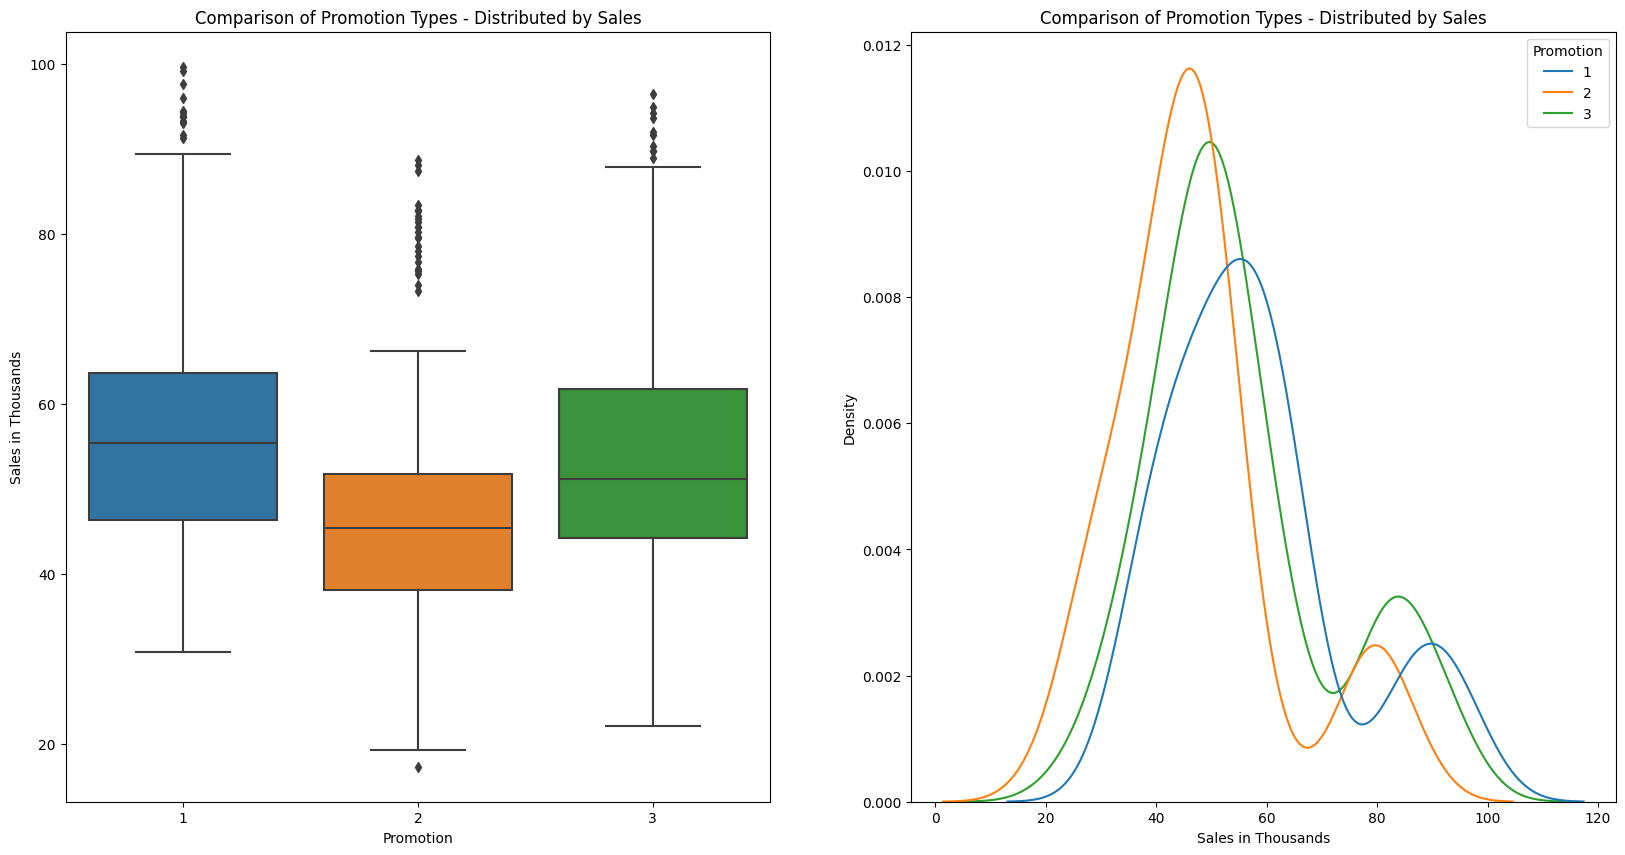

In [20]:
# Median sales over week
print("""The boxplot and kde plot suggest that Promotion 1 has the highest median sales, 
followed by Promotion 3 and Promotion 2.""")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(x="Promotion", y="SalesInThousands", data=df2, ax=ax[0])
sns.kdeplot(hue="Promotion", x="SalesInThousands", data=df2, ax=ax[1])
ax[0].set_ylabel("Sales in Thousands")
ax[1].set_xlabel("Sales in Thousands")
ax[0].set_title("Comparison of Promotion Types - Distributed by Sales")
ax[1].set_title("Comparison of Promotion Types - Distributed by Sales")
plt.show()

ii. What are total sales over 4 weeks?

Overall, the total sales remains flat over 4 weeks at around $ 7,300K.


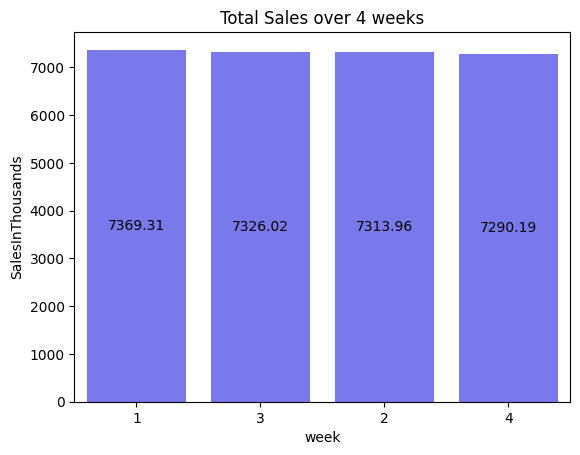

In [21]:
# Sales across different markets
print("Overall, the total sales remains flat over 4 weeks at around $ 7,300K.")

sales_by_week = df2.groupby("week")[
    "SalesInThousands"].sum().reset_index().sort_values(
                ascending=False, by="SalesInThousands")
sales_by_week["week"] = sales_by_week["week"].astype("str")
ax = sns.barplot(x="week", y="SalesInThousands",
            data=sales_by_week,
            color="blue", alpha=0.6)
ax.set_ylim(0,)
ax.bar_label(ax.containers[0], label_type="center")
plt.title("Total Sales over 4 weeks")
plt.show()

iii. Which promotion type is most effective in driving sales across 4 weeks?

The Promotion 3 outperforms over 4 weeks in terms of total sales.


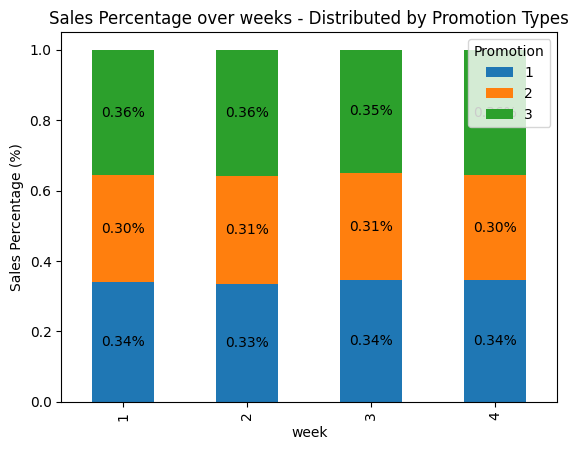

In [22]:
# 100% stacked bar chart
# Create a cross-tabulation table to analyze sales distribution by week and promotion.

print("The Promotion 3 outperforms over 4 weeks in terms of total sales.")

sales_pct_by_week_and_promotion = pandas.crosstab(
                index=df2["week"], 
                columns=df2["Promotion"],
                values=df2["SalesInThousands"],
                normalize="index",
                aggfunc=sum)

ax = sales_pct_by_week_and_promotion.plot(kind="bar", stacked=True)

ax.bar_label(ax.containers[0], fmt="%.2f%%", label_type="center")
ax.bar_label(ax.containers[1], fmt="%.2f%%", label_type="center")
ax.bar_label(ax.containers[2], fmt="%.2f%%", label_type="center")

# plot stacked bar chart
plt.ylabel("Sales Percentage (%)")
plt.title("Sales Percentage over weeks - Distributed by Promotion Types")
plt.show()

iv. What are total sales across different markets?

The Market 3 has the obviously highest sales compared to other market regions.


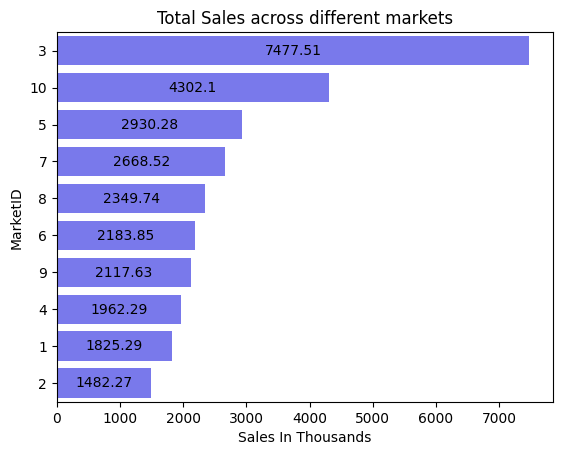

In [23]:
# Sales across different markets
print("The Market 3 has the obviously highest sales compared to other market regions.")

sales_by_market = df2.groupby("MarketID")[
    "SalesInThousands"].sum().reset_index().sort_values(
                ascending=False, by="SalesInThousands")
sales_by_market["MarketID"] = sales_by_market["MarketID"].astype("str")
ax = sns.barplot(x="SalesInThousands", y="MarketID",
            data=sales_by_market,
            color="blue", alpha=0.6)
ax.bar_label(ax.containers[0], label_type="center")
plt.title("Total Sales across different markets")
plt.xlabel("Sales In Thousands")
plt.show()

v. What are top 10 sales locations? 

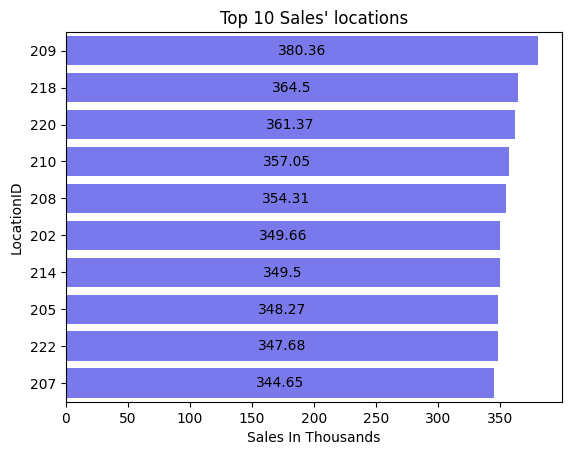

In [24]:
# Sales across different markets
sales_by_location = df2.groupby("LocationID")[
    "SalesInThousands"].sum().reset_index().sort_values(
                ascending=False, by="SalesInThousands").iloc[:10]
sales_by_location["LocationID"] = sales_by_location["LocationID"].astype("str")
ax = sns.barplot(x="SalesInThousands", y="LocationID",
            data=sales_by_location,
            color="blue", alpha=0.6)
ax.bar_label(ax.containers[0], label_type="center")
plt.xlabel("Sales In Thousands")
plt.title("Top 10 Sales' locations")
plt.show()

vi. What are total sales across different market sizes?

The pie chart shows the company is generating most of its sales from
medium market, accounting for 48.04% of sales


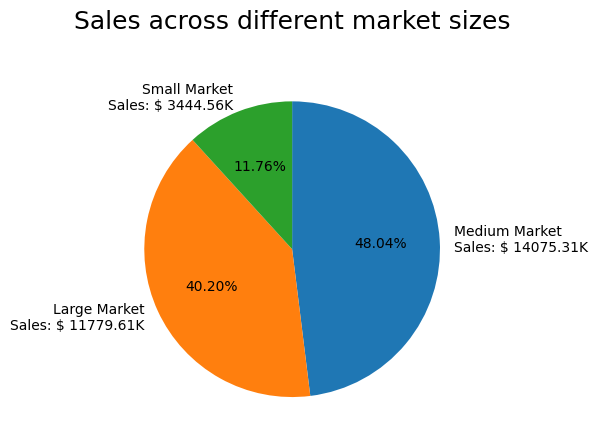

In [25]:
# Sales across different market sizes
print("""The pie chart shows the company is generating most of its sales from
medium market, accounting for 48.04% of sales""")

sales_by_market_size = df2.groupby("MarketSize")["SalesInThousands"].sum(
            ).reset_index().sort_values(by="SalesInThousands", ascending=False)

labels = sales_by_market_size["MarketSize"].astype(str) + " Market" + "\n" + "Sales: " + "$ " +\
                sales_by_market_size["SalesInThousands"].astype(str) + "K"
sizes = sales_by_market_size.index

def get_new_labels(sizes,labels):
        new_labels = [label for _, label in zip(sizes, labels)]
        return new_labels

plt.pie(sales_by_market_size["SalesInThousands"],
        startangle=90, counterclock=False, autopct="%1.2f%%",
        labels=get_new_labels(sizes, labels))

plt.title("Sales across different market sizes\n", fontsize=18)
plt.show()

vii. Which promotion type is most effective in driving sales in large, medium and small markets?

In small markets, Promotion 3 outperformed the other two.
In medium markets, Promotion 3 outperformed the other two.
In large market, Promotion 1 outperformed the other two.



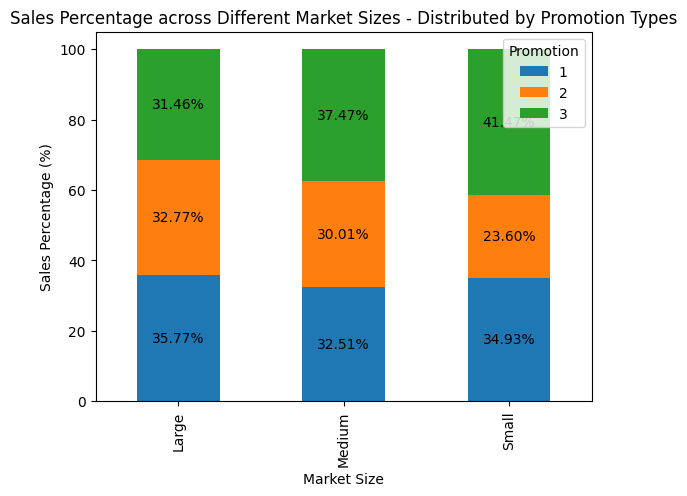

In [26]:
# 100% Stacked bar chart
# Create a cross-tabulation table to analyze sales distribution by market size and promotion.
print("""In small markets, Promotion 3 outperformed the other two.
In medium markets, Promotion 3 outperformed the other two.
In large market, Promotion 1 outperformed the other two.
""")
sales_pct_by_marketsizes_and_promotion = pandas.crosstab(index=df2["MarketSize"], 
                                columns=df2["Promotion"],
                                values=df2["SalesInThousands"],
                                aggfunc=sum, normalize="index") *100 # convert to %

# plot stacked bar chart
ax = sales_pct_by_marketsizes_and_promotion.plot(kind="bar", stacked=True)
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type="center")
ax.bar_label(ax.containers[1], fmt='%.2f%%', label_type="center")
ax.bar_label(ax.containers[2], fmt='%.2f%%', label_type="center")

plt.xlabel("Market Size")
plt.ylabel("Sales Percentage (%)")
plt.title("Sales Percentage across Different Market Sizes - Distributed by Promotion Types")
plt.show()

viii. Testing correlation between age of store and Sales

We form an assumption that older stores may be less attractive
to customers and thus it generates sales.

But, it turns out there is a negative weak correlation between sales
and age of store. It means Store age doesn't corrlete much with the sales, so we might not 
need to do renovation or relocation for the stores.


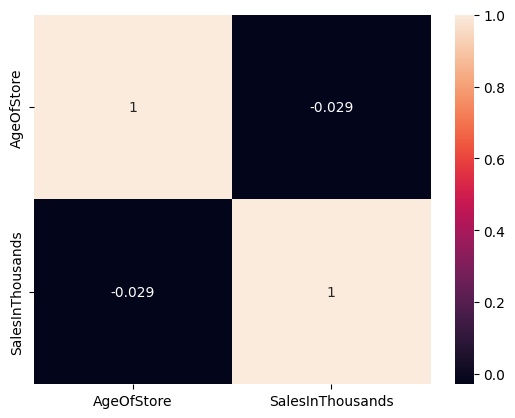

In [27]:
print("""We form an assumption that older stores may be less attractive
to customers and thus it generates sales.""")
print("""\nBut, it turns out there is a negative weak correlation between sales
and age of store. It means Store age doesn't corrlete much with the sales, so we might not 
need to do renovation or relocation for the stores.""")

sns.heatmap(df2[["AgeOfStore","SalesInThousands"]].corr(),
            annot=True)
plt.show()

## Step 4: Analyze A/B testing result and take action

**Compare control group (= Promotion 1) and experimental group (= Promotion 2)**

- H0: no statistically significant difference between promotion 1 and promotion 2
- H1: significantly difference between promotion 1 and promotion 2

In [28]:
from scipy.stats import ttest_ind

sales_promo_1 = df2.loc[df2["Promotion"] == 1, "SalesInThousands"]
sales_promo_2 = df2.loc[df2["Promotion"] == 2,"SalesInThousands"]

t_stat, p_values = ttest_ind(sales_promo_1,
         sales_promo_2,
         alternative="two-sided")

alpha = 0.05
print("p value: %.4f" %p_values)
if p_values > alpha:
    print("""Accept H0. There is no significant difference between mean sales
          in the promotion 1 and promotion 2.""")
    print("Conclusion: Both promotion 1 and promotion 2 bring similar sales result.")
else:
    print("""Reject H0. There is significant difference between mean sales 
          in the promotion 1 and promotion 2.""")
    if sales_promo_1.mean() > sales_promo_2.mean():
        print("Conclusion: Promotion 1 is better than Promotion 2.")
    else: 
        print("Conclusion: Promotion 1 is worse than Promotion 2.")

p value: 0.0000
Reject H0. There is significant difference between mean sales 
          in the promotion 1 and promotion 2.
Conclusion: Promotion 1 is better than Promotion 2.


In [29]:
from scipy.stats import ttest_ind

sales_promo_1 = df2.loc[df2["Promotion"] == 1, "SalesInThousands"]
sales_promo_3 = df2.loc[df2["Promotion"] == 3,"SalesInThousands"]

t_stat, p_values = ttest_ind(sales_promo_1,
         sales_promo_3,
         alternative="two-sided")

alpha = 0.05
print("p value: %.4f" %p_values)
if p_values > alpha:
    print("""Accept H0. There is no significant difference between mean sales
          in the promotion 1 and promotion 3.""")
    print("Conclusion: Both promotion 1 and promotion 3 bring similar sales result.")
else:
    print("""Reject H0. There is significant difference between mean sales 
          in the promotion 1 and promotion 3.""")
    if sales_promo_1.mean() > sales_promo_3.mean():
        print("Conclusion: Promotion 1 is better than Promotion 3.")
    else: 
        print("Conclusion: Promotion 1 is worse than Promotion 3.")

p value: 0.1208
Accept H0. There is no significant difference between mean sales
          in the promotion 1 and promotion 3.
Conclusion: Both promotion 1 and promotion 3 bring similar sales result.


## Conclusion

Promotions 1 and 3 outperform Promotion 2, and the difference between them is not statistically significant.

We will continue running Promotion 1 and Promotion 3, while we will stop the Promotion 2 budget. 